In [9]:
%matplotlib inline
import mne
from mne.event import define_target_events
from mne.channels import make_1020_channel_selections
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)

import sklearn

import os
from glob import glob
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_1samp

In [10]:
print("MNE version is", mne.__version__)
print("Python version is", sys.version)

MNE version is 0.24.1
Python version is 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


## path

In [11]:
cur_dir = os.getcwd()
data_dir = os.path.dirname(os.path.dirname(os.getcwd()))
file_dir = "2_Data/Ostwald2018/BIDS_data"
subjects = ['sub-001', 
                 'sub-003', 
                 'sub-004', 
                 'sub-005', 
                 'sub-006', 
                 'sub-008', 
                 'sub-009', 
                 'sub-010', 
                 'sub-012',
                 'sub-013',
                 'sub-014',
                 'sub-015', 
                 'sub-016',
                 'sub-017']

subject = subjects[1]

side = 'sourcedata-eeg_outside-MRT'
measures = ['eeg','beh']
task = os.path.join(subject + "_task-pdm_acq-outsideMRT_eeg.vhdr" )
preprocessed = os.path.join(subject + "_pred.fif")



In [12]:
bedata_path =  os.path.join(data_dir, file_dir, subject, side, measures[1])
bedata = pd.DataFrame({"condition":[],
                     "image_index":[],
                     "key_press":[],
                     "response_time":[],
                     "response_corr":[],
                     "stimulus_side":[],
                     "prioritization_cue":[]})
for beh in glob(bedata_path + "/*.tsv"):
    df = pd.read_csv(beh, sep = "\t")
    bedata = pd.concat([bedata, df], sort = False,ignore_index=True)

In [13]:
edata_path = os.path.join(data_dir, file_dir, subject, side, measures[0], task)
edata = mne.io.read_raw_brainvision(edata_path)


Extracting parameters from D:\yikang1020\yikangsystem1020\2_Projects\202206_Centro-parietal positivity\2_Study1_CPP\2_Data/Ostwald2018/BIDS_data\sub-003\sourcedata-eeg_outside-MRT\eeg\sub-003_task-pdm_acq-outsideMRT_eeg.vhdr...


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\yikang1020\\yikangsystem1020\\2_Projects\\202206_Centro-parietal positivity\\2_Study1_CPP\\2_Data\\Ostwald2018\\BIDS_data\\sub-003\\sourcedata-eeg_outside-MRT\\eeg\\sub-003_task-pdm_acq-outsideMRT_eeg.vhdr'

## events

In [ ]:
events = mne.events_from_annotations(edata)[0]
events_id = mne.events_from_annotations(edata)[1]

event_dict = {
  'Response/car': 5,
  'Response/face': 6,
  'Stimulus/hc/p/left': 10,
  'Stimulus/hc/p/right': 11,
  'Stimulus/hc/np/left': 20,
  'Stimulus/hc/np/right': 21,
  'Stimulus/lc/p/left': 30,
  'Stimulus/lc/p/right': 31,
  'Stimulus/lc/np/left': 40,
  'Stimulus/lc/np/right': 41,
  'Cue/Left': 74,
  'Cue/Right': 75,
  'Cue/double': 76
}

cue_dict =  {
  'Cue/Left': 74,
  'Cue/Right': 75,
  'Cue/double': 76
}

stimulus_dict = {
  'Stimulus/hc/p/left': 10,
  'Stimulus/hc/p/right': 11,
  'Stimulus/hc/np/left': 20,
  'Stimulus/hc/np/right': 21,
  'Stimulus/lc/p/left': 30,
  'Stimulus/lc/p/right': 31,
  'Stimulus/lc/np/left': 40,
  'Stimulus/lc/np/right': 41,
}

response_dict = {
  'Response/car': 5,
  'Response/face': 6,
}

In [6]:
fig = mne.viz.plot_events(events, event_id=events_id, sfreq=edata.info['sfreq'],
                          first_samp=edata.first_samp)

NameError: name 'events' is not defined

## stimulus-locked 

In [535]:
for subject in [subject]:
    
    edata.set_channel_types({'EOG':'eog'})   
    edata.set_channel_types({'ECG':'ecg'})
    
    edata.resample(512, npad="auto")
    
    edata.filter(1, 30, fir_design='firwin', picks=['eeg'])
    
    edata.set_eeg_reference('average', projection=True).apply_proj()
    
    events_from_annot, event_dict = mne.events_from_annotations(edata)

    
    epochs = mne.Epochs(edata, events_from_annot, event_id=stimulus_dict, tmin=-1, tmax=1,
                     baseline = (None,0), preload=True, picks=['eeg'])
    
#    ica = mne.preprocessing.ICA(n_components=50, random_state=97)
    
#    ica.fit(epochs) 
    
#    ica.exclude = []                                   
#    eog_indices, eog_scores = ica.find_bads_eog(edata) 
                                                                         
#    ecg_indices, ecg_scores = ica.find_bads_ecg(edata, method='ctps')
                                                                   
#    ica.exclude = eog_indices + ecg_indices 
    
#    ica.apply(epochs) 

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_19564\1330877702.py:3: RuntimeWarning: The unit for channel(s) EOG has changed from NA to V.
  edata.set_channel_types({'EOG':'eog'})
C:\Users\liuyikang\AppData\Local\Temp\ipykernel_19564\1330877702.py:4: RuntimeWarning: The unit for channel(s) ECG has changed from NA to V.
  edata.set_channel_types({'ECG':'ecg'})


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1691 samples (3.303 sec)

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'S

Not setting metadata
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


C:\Users\liuyikang\AppData\Local\Temp\ipykernel_19564\3039088007.py:6: RuntimeWarning: Some values in overlay_times fall outside of the epochs time interval (between -1.0 s and 1.0 s)
  epochs.plot_image(picks = ['CPz','CP1','CP2'],


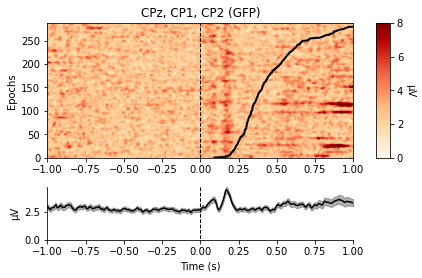

[<Figure size 432x288 with 3 Axes>]

In [537]:
rts = bedata['response_time'].to_numpy()

order = rts.argsort()


epochs.plot_image(picks = ['CPz','CP1','CP2'],
                  order=order, 
                  sigma=2,
                  overlay_times=rts, 
                  combine='gfp',
                  cmap = 'OrRd',
                  vmin = 0,
                  vmax = 8)

In [538]:
# baseline: -200 ms before stimulus 
channel = ['CPz','CP1','CP2']

time = [-0.2, 0]

epochs_baseline = epochs.copy().pick_channels(channel)

epochs_baseline = epochs_baseline.crop(time[0],time[1])

epochs_baseline = epochs_baseline.get_data()

epochs_baseline = np.mean(epochs_baseline, axis = 1)

epochs_baseline = np.mean(epochs_baseline, axis = 1)

epochs_baseline = np.reshape(epochs_baseline, (288,1))

## response-locked

In [540]:
for subject in [subject]:
    
    edata.set_channel_types({'EOG':'eog'})   
    edata.set_channel_types({'ECG':'ecg'})
    
    edata.resample(512, npad="auto")
    
    edata.filter(1, 30, fir_design='firwin', picks=['eeg'])
    
    edata.set_eeg_reference('average', projection=True).apply_proj()
    
    events_from_annot, event_dict = mne.events_from_annotations(edata)

    
    epochs_res = mne.Epochs(edata, events_from_annot, event_id=response_dict, tmin=-1, tmax=1,
                     baseline = (None,0), preload=True, picks=['eeg'])
    


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1691 samples (3.303 sec)

Projections have already been applied. Setting proj attribute to True.
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 30', 'Stimulus/S 31', 'Stimulus/S 40', 'Stimulus/S 41', 'Stimulus/S 73', 'Stimulus/S 74', 'Stimulus/S 75', 'Stimulus/S 76', 'SyncStatus/Sync Off']
Not setting metadata
Not setting metadata
288 matching ev

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_19564\2283044799.py:10: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  edata.set_eeg_reference('average', projection=True).apply_proj()


0 bad epochs dropped


Not setting metadata
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


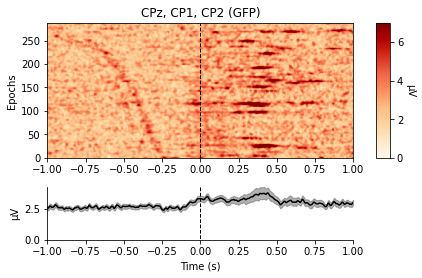

[<Figure size 432x288 with 3 Axes>]

In [541]:
epochs_res.plot_image(picks = ['CPz','CP1','CP2'],
                  order=order, 
                  sigma=2,
                  combine='gfp',
                  cmap = 'OrRd',
                  vmin = 0,
                  vmax = 7)

## check whether CPP exists

In [542]:
channel = ['CPz','CP1','CP2']

time = [-0.25, 0]

epochs_CPP = epochs_res.copy().pick_channels(channel)

epochs_CPP = epochs_CPP.crop(time[0],time[1])

times = epochs_CPP.times

epochs_CPP = epochs_CPP.get_data()

epochs_CPP = np.mean(epochs_CPP, axis = 1) - epochs_baseline

consecutives = []
for trial in range(epochs_CPP.shape[0]):
    ps = []
    for i in range(len(times)):
        t,p = ttest_1samp(epochs_CPP[trial,:],0)
        if p<=0.05:
            p = 1
        else:
            p = 0
        ps = np.append(ps,p)
    start = 0
    end = start + 15
    consecutive = False
    while (end <= len(times)) and (consecutive == False): 
        if np.sum(ps[start:end]) == 15:
            consecutive = True
        else:
            start = start + 1
            end = start + 15
    consecutives = np.append(consecutives,consecutive)

## extract cpp peak

In [543]:
channel = ['CPz','CP1','CP2']

time = [-0.25, -0.1]

epochs_CPP = epochs_res.copy().pick_channels(channel)

epochs_CPP = epochs_CPP.crop(time[0],time[1])

times = epochs_CPP.times

epochs_CPP = epochs_CPP.get_data()

epochs_CPP = np.mean(epochs_CPP, axis = 1) - epochs_baseline

CPP_peak = np.amax(epochs_CPP, axis = 1)

## extract cpp slope

In [544]:
channel = ['CPz','CP1','CP2']

time = [-0.25, -0.1]


epochs_CPP = epochs_res.copy().pick_channels(channel)

epochs_CPP = epochs_CPP.crop(time[0],time[1])

times = epochs_CPP.times

epochs_CPP = epochs_CPP.get_data()

epochs_CPP = np.mean(epochs_CPP, axis = 1) - epochs_baseline

CPP_slopes = []
for i in range(epochs_CPP.shape[0]):
    CPP_slope = np.polyfit(times,epochs_CPP[i,:],1)[0]
    CPP_slopes = np.append(CPP_slopes,CPP_slope)

## extract cpp amplitude

In [545]:
channel = ['CPz','CP1','CP2']

time = [-0.1, -0]


epochs_CPP = epochs_res.copy().pick_channels(channel)

epochs_CPP = epochs_CPP.crop(time[0],time[1])

times = epochs_CPP.times

epochs_CPP = epochs_CPP.get_data()

epochs_CPP = np.mean(epochs_CPP, axis = 1) - epochs_baseline

CPP_amplitudes = np.mean(epochs_CPP, axis = 1)

## delete value where no cpp exists

In [546]:
rts = np.delete(rts, np.where(consecutives == 0))
CPP_peak = np.delete(CPP_peak, np.where(consecutives == 0))
CPP_slopes = np.delete(CPP_slopes, np.where(consecutives == 0))
CPP_amplitudes = np.delete(CPP_amplitudes, np.where(consecutives == 0))

## use rt to test cpp

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-0.1270258817265115, 0.039537631144652446)

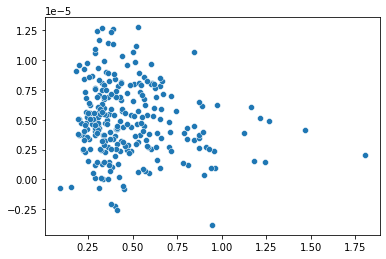

In [547]:
y = CPP_peak
x = rts
ax = sns.scatterplot(x, y)
stats.pearsonr(x,y)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-0.1845362724638683, 0.002662241882500213)

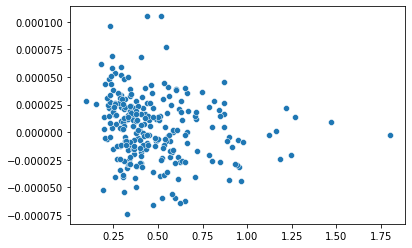

In [548]:
y = CPP_slopes
x = rts
ax = sns.scatterplot(x, y)
stats.pearsonr(x,y)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-0.2957946991886715, 1.040295095416428e-06)

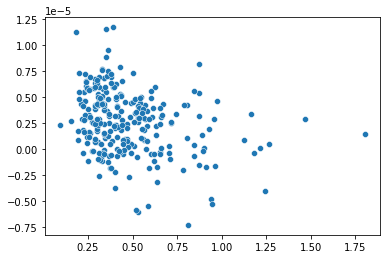

In [549]:
y = CPP_amplitudes
x = rts
ax = sns.scatterplot(x, y)
stats.pearsonr(x,y)